#Reglas de Simpson
Además de la regla del Trapecio con una segmentación más fina, otra forma de obtener una estimación más exacta de una integral consiste en usar polinomios de grado superior para unir los puntos. Por ejemplo, si hay otro punto a la mitad entre $f(a)$ y $f(b)$, los tres puntos se pueden unir con una parábola. Si hay dos puntos igualmente espaciados entre $f(a)$ y $f(b)$, los cuatro puntos se pueden unir con un polinomio de tercer grado. Las fórmulas que resultan de tomar las integrales bajos esos polinomios se conocen como *reglas de Simpson*.

#Regla de Simpson 1/3
La regla de Simpson 1/3 resulta cuando un polinomio de interpolación de segundo grado se sustituye en la integral:
\begin{equation}
I=\int_a^bf(x)dx\cong\int_a^bf_2(x)dx
\end{equation}
designando $a=x_0$, $b=x_2$, y $f_2(x)$ se representa como un polinomio de Lagrange de segundo orden. Resolviendo la integral y haciendo manipulaciones algebraicas se obtiene
\begin{equation}
I\cong(b-a)\frac{f(x_0)+4f(x_1)+f(x_2)}{6}
\end{equation}
donde $x_1$ es el punto intermedio entre $a$ y $b$, que esta dado por $(b+a)/2$. Esta es la *fórmula de Simpson 1/3*.

#Regla de Simpson 1/3 de aplicación múltiple
Así como regla del trapecio, la regla de Simpson se mejora al dividir el intervalo en varios segmentos de un mismo tamaño.Resolviendo las integrales y haciendo las manipulaciones algebraicas pertinentes se obtiene
\begin{equation}
I\cong(b-a)\frac{f(x_0)+4\sum_{i=1,3,5}^{n-1}f(x_i)+2\sum_{j=2,4,6}^{n-2}f(x_j)+f(x_n)}{3n}
\end{equation}


In [4]:
#Código hecho por: Diana Ailed Hernández Bustos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad

# Integral Simpson 1/3 ==> se requieren # subintervalos pares, por lo tanto puntos impares (3,5,7 en adelante)

In [5]:
def func(x):
    y= 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5
    return y

def sim13(x, d, h):
    #Regla de Simpson (1/3):
    suma = 0
    fx0=func(a)
    fxn=func(b)

    for i in range (d):
        if i == (d-1):
            I2 = fx0 + fxn
            I = (suma + I2)*(h/3)

        elif i!= (d-2):
            test = i%2

            if test == 0:
                p = i+1
                suma = suma + 4*func(x[p]) # Son los números impares de x

            elif test!= 0:
                p = i+1
                suma = suma + 2*func(x[p])
    return I

def grafica(x, a, b, d):
    #Gráfica:
    k = 100
    x1 = np.linspace(a, b, k)
    fx = np.zeros([k])
    y = np.zeros([d])

    for i in range (k):
        fx[i] = func(x1[i])

    for i in range (d):
        y[i] = func(x[i])

    plt.title('Integración')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.plot(x1, fx ,color="blue",linewidth=2, label= "Función")
    plt.scatter(x, y, color='black', label = 'Intérvalos')
    plt.legend()
    plt.show()
    return y

REGLA SIMPSON 1/3:
Valor obtenido: 1.64041960
Valor analítico: 1.64053333
Error porcentual : 0.00693253


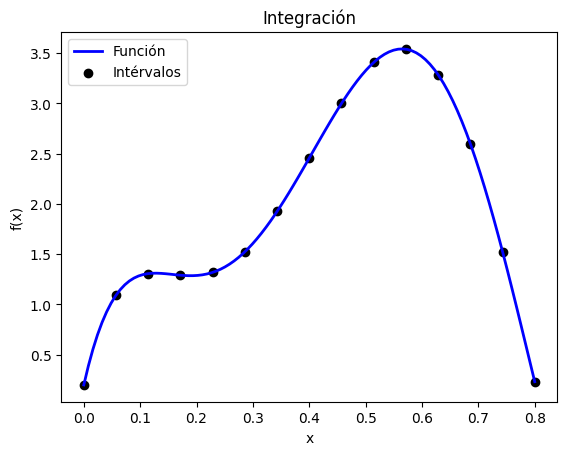

In [6]:
n = 14         # Intervalos
a = 0
b = 0.8
h = (b-a)/n

p = n+1       # No de puntos = intervalos + 1
x = np.linspace(a,b,p)
d = len(x)

#Integral analítica:
integral, err = integrate.quad(func, a, b)
A = integral # Valor analítico

#Cálculos:
I = sim13 (x, d, h)
et = np.abs((A-I)/A)*100
print("REGLA SIMPSON 1/3:")
print("Valor obtenido: %.8f" %I)
print("Valor analítico: %.8f" %A)
print("Error porcentual : %.8f" %et)

#Gráfica:
j = grafica(x, a, b, d)